In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import random

In [2]:
x = random.sample(range(100), 100)

In [3]:
len(x)

100

In [4]:
df = pd.DataFrame({"x":x})
df["cat"] = random.sample(list(33*"A") + list(33*"B") + list(34*"C"), 100)

In [5]:
df

,x,cat
0,71,A
1,38,A
2,56,C
3,17,A
4,97,A
...,...,...
95,57,C
96,27,B
97,37,A
98,44,A


In [6]:
df["cat"].value_counts()

C    34
A    33
B    33
Name: cat, dtype: int64

In [7]:
# define y
mA, mB, mC = 0.6, -1.0, 0.7
cA, cB, cC = 0.0, -26.0, -60.0

In [8]:
df["y"] = 0.0
isA = df["cat"]=="A"
isB = df["cat"]=="B"
isC = df["cat"]=="C"
df.loc[isA,"y"] = mA*df.loc[isA,"x"] + cA + np.random.normal(size=33,scale=5.0)
df.loc[isB,"y"] = mB*df.loc[isB,"x"] + cB + np.random.normal(size=33,scale=5.0)
df.loc[isC,"y"] = mC*df.loc[isC,"x"] + cC + np.random.normal(size=34,scale=5.0)

In [9]:
df

,x,cat,y
0,71,A,42.694459
1,38,A,26.847184
2,56,C,-23.335703
3,17,A,8.854233
4,97,A,48.279219
...,...,...,...
95,57,C,-9.840833
96,27,B,-42.586210
97,37,A,28.296982
98,44,A,18.420180


In [10]:
cat_column = df["cat"]

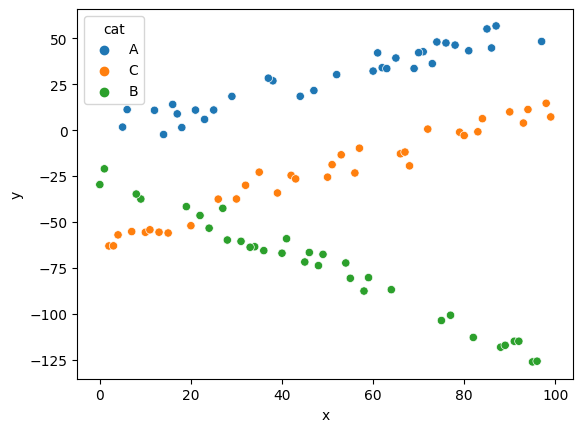

In [11]:
fig,ax=plt.subplots()
sns.scatterplot(data=df, x="x",y="y",ax=ax,marker="o",hue="cat",linestyle="None");

In [13]:
df1hot = pd.get_dummies(df)
df1hot

,x,y,cat_A,cat_B,cat_C
0,71,42.694459,1,0,0
1,38,26.847184,1,0,0
2,56,-23.335703,0,0,1
3,17,8.854233,1,0,0
4,97,48.279219,1,0,0
...,...,...,...,...,...
95,57,-9.840833,0,0,1
96,27,-42.586210,0,1,0
97,37,28.296982,1,0,0
98,44,18.420180,1,0,0


In [14]:
X = df1hot.drop("y", axis=1)
y = df1hot["y"]
linmod = LinearRegression()
linmod.fit(X,y)

In [17]:
df1hot["pred"] = linmod.predict(X)

In [18]:
df1hot

,x,y,cat_A,cat_B,cat_C,pred
0,71,42.694459,1,0,0,31.582176
1,38,26.847184,1,0,0,26.749514
2,56,-23.335703,0,0,1,-22.881616
3,17,8.854233,1,0,0,23.674185
4,97,48.279219,1,0,0,35.389727
...,...,...,...,...,...,...
95,57,-9.840833,0,0,1,-22.735172
96,27,-42.586210,0,1,0,-78.038409
97,37,28.296982,1,0,0,26.603070
98,44,18.420180,1,0,0,27.628180


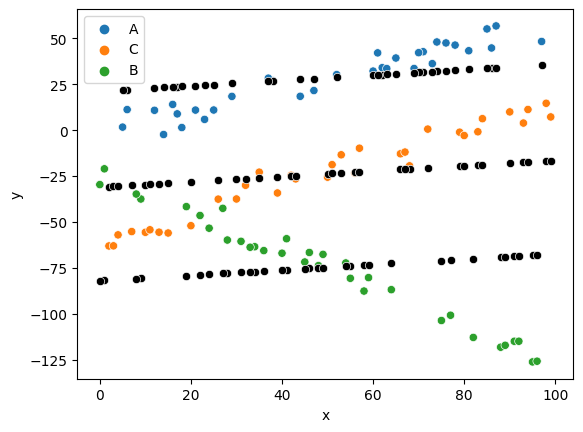

In [24]:
df1hot["cat"] = cat_column
fig,ax=plt.subplots()
#df1hot.plot(x="x", y=["y","pred"], marker="o",linestyle="None", ax=ax);
sns.scatterplot(data=df1hot, x="x", y="y", ax=ax,marker="o",hue="cat",linestyle="None")
sns.scatterplot(data=df1hot, x="x", y="pred", ax=ax,marker="o",linestyle="None",color="black");

In [25]:
linmod.coef_, linmod.intercept_

(array([  0.14644428,  51.8147213 , -51.36231482,  -0.45240648]),
 -30.6300894520046)

#### The prediction works for categorical variables works as follows:

$x_i = (x^{num}_i,x_i^A,x_i^B,x_i^C)$

where only one of $x_A$, $x_B$ and$x_C$ is one; the rest are zero, as required by one-hot encoding.

$y_{i} = m^{num}x^{num}_i + m_Ax_i^A + m_Bx_i^B + m_Cx_i^C$

So obviously the slope is same, only the intercepts change.

So how to fix this?

In [33]:
df1hot = df1hot.drop(["pred","cat"],axis=1)

In [32]:
df1hot["xA"] = df1hot["x"] * df1hot["cat_A"]
df1hot["xB"] = df1hot["x"] * df1hot["cat_B"]
df1hot["xC"] = df1hot["x"] * df1hot["cat_C"]
df1hot

,x,y,cat_A,cat_B,cat_C,xA,xB,xC
0,71,42.694459,1,0,0,71,0,0
1,38,26.847184,1,0,0,38,0,0
2,56,-23.335703,0,0,1,0,0,56
3,17,8.854233,1,0,0,17,0,0
4,97,48.279219,1,0,0,97,0,0
...,...,...,...,...,...,...,...,...
95,57,-9.840833,0,0,1,0,0,57
96,27,-42.586210,0,1,0,0,27,0
97,37,28.296982,1,0,0,37,0,0
98,44,18.420180,1,0,0,44,0,0


In [34]:
X = df1hot.drop("y", axis=1)
y = df1hot["y"]

In [36]:
linmod = LinearRegression()
linmod.fit(X,y)

LinearRegression()

In [37]:
df1hot

,x,y,cat_A,cat_B,cat_C,xA,xB,xC
0,71,42.694459,1,0,0,71,0,0
1,38,26.847184,1,0,0,38,0,0
2,56,-23.335703,0,0,1,0,0,56
3,17,8.854233,1,0,0,17,0,0
4,97,48.279219,1,0,0,97,0,0
...,...,...,...,...,...,...,...,...
95,57,-9.840833,0,0,1,0,0,57
96,27,-42.586210,0,1,0,0,27,0
97,37,28.296982,1,0,0,37,0,0
98,44,18.420180,1,0,0,44,0,0


In [38]:
df1hot["cat"] = cat_column
df1hot

,x,y,cat_A,cat_B,cat_C,xA,xB,xC,cat
0,71,42.694459,1,0,0,71,0,0,A
1,38,26.847184,1,0,0,38,0,0,A
2,56,-23.335703,0,0,1,0,0,56,C
3,17,8.854233,1,0,0,17,0,0,A
4,97,48.279219,1,0,0,97,0,0,A
...,...,...,...,...,...,...,...,...,...
95,57,-9.840833,0,0,1,0,0,57,C
96,27,-42.586210,0,1,0,0,27,0,B
97,37,28.296982,1,0,0,37,0,0,A
98,44,18.420180,1,0,0,44,0,0,A


In [40]:
df1hot["pred"] = linmod.predict(X)

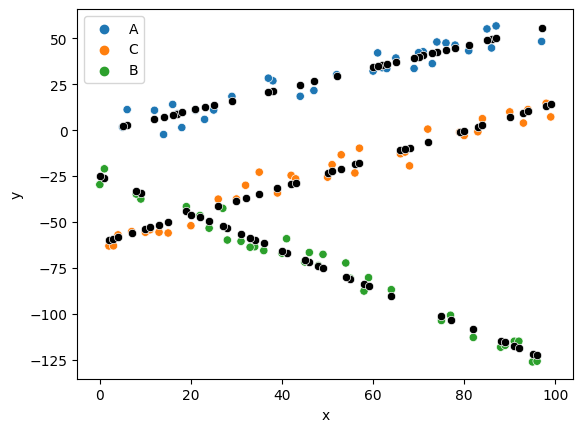

In [41]:
df1hot["cat"] = cat_column

fig,ax=plt.subplots()
#df1hot.plot(x="x", y=["y","pred"], marker="o",linestyle="None", ax=ax);
sns.scatterplot(data=df1hot, x="x", y="y", ax=ax,marker="o",hue="cat",linestyle="None")
sns.scatterplot(data=df1hot, x="x", y="pred", ax=ax,marker="o",linestyle="None",color="black");

In [54]:
df1hot

,x,y,cat_A,cat_B,cat_C,pred
0,13,15.488087,1,0,0,24.598435
1,70,41.695757,1,0,0,28.171251
2,72,52.379573,1,0,0,28.296613
3,2,-61.405267,0,0,1,-29.805102
4,94,-117.867005,0,1,0,-79.955129
...,...,...,...,...,...,...
95,7,5.881012,1,0,0,24.222350
96,46,-35.228668,0,0,1,-27.047139
97,59,27.766343,1,0,0,27.481761
98,18,10.862695,1,0,0,24.911840
